In [1]:
### version: Gang Shen. 2018/2/25.

# import pandas as pd
# import numpy as np
# import sys

import matplotlib.pyplot as plt

from Utils import IOUtils

from pathlib import Path
import pandas as pd

from h5py import File
import re

%matplotlib inline
%load_ext autoreload
%autoreload 2

# print ("System version = {}".format(sys.version))
# print ("Pandas version = {}".format(pd.__version__))
# print ("Numpy  version = {}".format(np.__version__))

pd.set_option("display.max_columns",101)
pd.set_option("display.max_rows",201)



# Combine all data

In [2]:
bu_keys = list(set([re.search(r'bu\d+', x).group() for x in IOUtils.df_reader('bu*',topdir='../tick2016/bu').gen_find()]))
ru_keys = list(set([re.search(r'ru\d+', x).group() for x in IOUtils.df_reader('ru*',topdir='../tick2016/ru').gen_find()]))


In [6]:
for bu_key in bu_keys:
    print(bu_key)
    try:
        bu_raw_tick = pd.read_hdf('./Data/Bu.h5', key=bu_key)
    except (FileNotFoundError, KeyError) as FailReadTick:
        bu_raw_tick = IOUtils.df_reader(bu_key+'*', topdir='../tick2016/bu/').get_tick(raw=True)
        bu_raw_tick.to_hdf('./Data/Bu.h5',key=bu_key)

for ru_key in ru_keys:
    print(ru_key)
    try:
        ru_raw_tick = pd.read_hdf('./Data/Ru.h5', key=ru_key)
    except (FileNotFoundError, KeyError) as FailReadTick:
        ru_raw_tick = IOUtils.df_reader(ru_key+'*', topdir='../tick2016/ru/').get_tick(raw=True)
        ru_raw_tick.to_hdf('./Data/Ru.h5',key=ru_key)
    

bu1706
bu1607
bu1604
bu1703
bu1602
bu1701
bu1712
bu1705
bu1611
bu1605
bu1803
bu1608
bu1603
bu1606
bu1612
bu1609
bu1709
bu1704
bu1809
bu1812
bu1806
bu1610
bu1702
bu1601
ru1609
ru1703
ru1701
ru1611
ru1610
ru1607
ru1707
ru1706
ru1709
ru1711
ru1710
ru1704
ru1708
ru1705
ru1604
ru1605
ru1603
ru1606
ru1601
ru1608


## Bu

In [3]:
bu_keys.sort()
bu_keys

['bu1601',
 'bu1602',
 'bu1603',
 'bu1604',
 'bu1605',
 'bu1606',
 'bu1607',
 'bu1608',
 'bu1609',
 'bu1610',
 'bu1611',
 'bu1612',
 'bu1701',
 'bu1702',
 'bu1703',
 'bu1704',
 'bu1705',
 'bu1706',
 'bu1709',
 'bu1712',
 'bu1803',
 'bu1806',
 'bu1809',
 'bu1812']

In [4]:
Bu = pd.DataFrame()
Ru = pd.DataFrame()
with File('./Data/Bu.h5','r') as F:
    for instrument in F.keys():
        tmp = pd.read_hdf('./Data/Bu.h5', instrument)
        Bu = Bu.append(tmp)

In [6]:
Bu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19933596 entries, 2016-01-04 08:59:00.500000 to 2016-12-30 15:15:05
Data columns (total 37 columns):
InstrumentID       object
Date               int64
TimeStamp          float64
LastPrice          float64
HighPrice          float64
LowPrice           float64
Volume             float64
Turnover           float64
AccVolume          float64
AccTurnover        float64
SettlePrice        float64
OpenInterest       float64
AskPrice1          float64
AskPrice2          float64
AskPrice3          float64
AskPrice4          float64
AskPrice5          float64
AskVolume1         float64
AskVolume2         float64
AskVolume3         float64
AskVolume4         float64
AskVolume5         float64
BidPrice1          float64
BidPrice2          float64
BidPrice3          float64
BidPrice4          float64
BidPrice5          float64
BidVolume1         float64
BidVolume2         float64
BidVolume3         float64
BidVolume4         float64
BidVolume5  

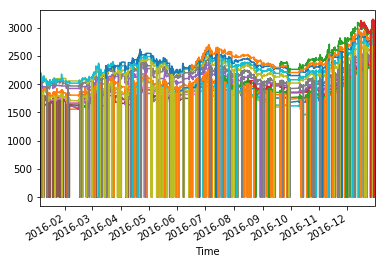

In [8]:
Bu_grouped = Bu.groupby(by='InstrumentID')
Bu_grouped['LastPrice'].plot()
plt.show()

In [9]:
with File('./Data/Ru.h5','r') as F:
    for instrument in F.keys():
        tmp = pd.read_hdf('./Data/Ru.h5', instrument)
        Ru = Ru.append(tmp)

In [9]:
print(Bu.InstrumentID.unique())
print(Ru.InstrumentID.unique())

['bu1601' 'bu1602' 'bu1603' 'bu1604' 'bu1605' 'bu1704' 'bu1803' 'bu1809']
['ru1601' 'ru1603' 'ru1604' 'ru1605' 'ru1606']


## Bu

In [12]:
Bu_group = Bu.groupby(by='InstrumentID')

InstrumentID
bu1601    Axes(0.125,0.2;0.775x0.68)
bu1602    Axes(0.125,0.2;0.775x0.68)
bu1603    Axes(0.125,0.2;0.775x0.68)
bu1604    Axes(0.125,0.2;0.775x0.68)
bu1605    Axes(0.125,0.2;0.775x0.68)
bu1606    Axes(0.125,0.2;0.775x0.68)
bu1607    Axes(0.125,0.2;0.775x0.68)
bu1608    Axes(0.125,0.2;0.775x0.68)
bu1609    Axes(0.125,0.2;0.775x0.68)
bu1610    Axes(0.125,0.2;0.775x0.68)
bu1611    Axes(0.125,0.2;0.775x0.68)
bu1612    Axes(0.125,0.2;0.775x0.68)
bu1701    Axes(0.125,0.2;0.775x0.68)
bu1702    Axes(0.125,0.2;0.775x0.68)
bu1703    Axes(0.125,0.2;0.775x0.68)
bu1704    Axes(0.125,0.2;0.775x0.68)
bu1705    Axes(0.125,0.2;0.775x0.68)
bu1706    Axes(0.125,0.2;0.775x0.68)
bu1709    Axes(0.125,0.2;0.775x0.68)
bu1712    Axes(0.125,0.2;0.775x0.68)
bu1803    Axes(0.125,0.2;0.775x0.68)
bu1806    Axes(0.125,0.2;0.775x0.68)
bu1809    Axes(0.125,0.2;0.775x0.68)
bu1812    Axes(0.125,0.2;0.775x0.68)
Name: LastPrice, dtype: object

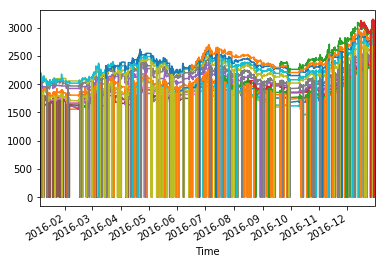

In [13]:
Bu_group['LastPrice'].plot()

InstrumentID
bu1601    Axes(0.125,0.2;0.775x0.68)
bu1602    Axes(0.125,0.2;0.775x0.68)
bu1603    Axes(0.125,0.2;0.775x0.68)
bu1604    Axes(0.125,0.2;0.775x0.68)
bu1605    Axes(0.125,0.2;0.775x0.68)
bu1606    Axes(0.125,0.2;0.775x0.68)
bu1607    Axes(0.125,0.2;0.775x0.68)
bu1608    Axes(0.125,0.2;0.775x0.68)
bu1609    Axes(0.125,0.2;0.775x0.68)
bu1610    Axes(0.125,0.2;0.775x0.68)
bu1611    Axes(0.125,0.2;0.775x0.68)
bu1612    Axes(0.125,0.2;0.775x0.68)
bu1701    Axes(0.125,0.2;0.775x0.68)
bu1702    Axes(0.125,0.2;0.775x0.68)
bu1703    Axes(0.125,0.2;0.775x0.68)
bu1704    Axes(0.125,0.2;0.775x0.68)
bu1705    Axes(0.125,0.2;0.775x0.68)
bu1706    Axes(0.125,0.2;0.775x0.68)
bu1709    Axes(0.125,0.2;0.775x0.68)
bu1712    Axes(0.125,0.2;0.775x0.68)
bu1803    Axes(0.125,0.2;0.775x0.68)
bu1806    Axes(0.125,0.2;0.775x0.68)
bu1809    Axes(0.125,0.2;0.775x0.68)
bu1812    Axes(0.125,0.2;0.775x0.68)
Name: LastPrice, dtype: object

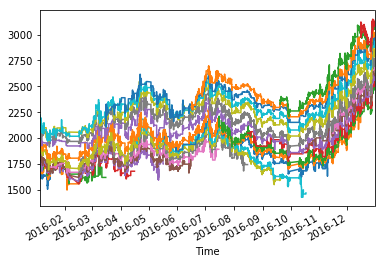

In [25]:
Bu.query('LastPrice>0').groupby(by='InstrumentID').LastPrice.plot()

In [ ]:
Bu.query('LastPrice<0')

## Ru

In [31]:
Ru.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29687237 entries, 2016-01-04 08:59:00.500000 to 2016-12-30 15:15:05
Data columns (total 37 columns):
InstrumentID       object
Date               int64
TimeStamp          float64
LastPrice          float64
HighPrice          float64
LowPrice           float64
Volume             float64
Turnover           float64
AccVolume          float64
AccTurnover        float64
SettlePrice        float64
OpenInterest       float64
AskPrice1          float64
AskPrice2          float64
AskPrice3          float64
AskPrice4          float64
AskPrice5          float64
AskVolume1         float64
AskVolume2         float64
AskVolume3         float64
AskVolume4         float64
AskVolume5         float64
BidPrice1          float64
BidPrice2          float64
BidPrice3          float64
BidPrice4          float64
BidPrice5          float64
BidVolume1         float64
BidVolume2         float64
BidVolume3         float64
BidVolume4         float64
BidVolume5  

InstrumentID
ru1601    Axes(0.125,0.2;0.775x0.68)
ru1603    Axes(0.125,0.2;0.775x0.68)
ru1604    Axes(0.125,0.2;0.775x0.68)
ru1605    Axes(0.125,0.2;0.775x0.68)
ru1606    Axes(0.125,0.2;0.775x0.68)
ru1607    Axes(0.125,0.2;0.775x0.68)
ru1608    Axes(0.125,0.2;0.775x0.68)
ru1609    Axes(0.125,0.2;0.775x0.68)
ru1610    Axes(0.125,0.2;0.775x0.68)
ru1611    Axes(0.125,0.2;0.775x0.68)
ru1701    Axes(0.125,0.2;0.775x0.68)
ru1703    Axes(0.125,0.2;0.775x0.68)
ru1704    Axes(0.125,0.2;0.775x0.68)
ru1705    Axes(0.125,0.2;0.775x0.68)
ru1706    Axes(0.125,0.2;0.775x0.68)
ru1707    Axes(0.125,0.2;0.775x0.68)
ru1708    Axes(0.125,0.2;0.775x0.68)
ru1709    Axes(0.125,0.2;0.775x0.68)
ru1710    Axes(0.125,0.2;0.775x0.68)
ru1711    Axes(0.125,0.2;0.775x0.68)
Name: LastPrice, dtype: object

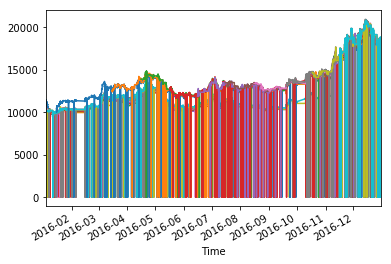

In [11]:
Ru_group = Ru.groupby(by='InstrumentID')
Ru_group['LastPrice'].plot()

InstrumentID
ru1601    Axes(0.125,0.2;0.775x0.68)
ru1603    Axes(0.125,0.2;0.775x0.68)
ru1604    Axes(0.125,0.2;0.775x0.68)
ru1605    Axes(0.125,0.2;0.775x0.68)
ru1606    Axes(0.125,0.2;0.775x0.68)
ru1607    Axes(0.125,0.2;0.775x0.68)
ru1608    Axes(0.125,0.2;0.775x0.68)
ru1609    Axes(0.125,0.2;0.775x0.68)
ru1610    Axes(0.125,0.2;0.775x0.68)
ru1611    Axes(0.125,0.2;0.775x0.68)
ru1701    Axes(0.125,0.2;0.775x0.68)
ru1703    Axes(0.125,0.2;0.775x0.68)
ru1704    Axes(0.125,0.2;0.775x0.68)
ru1705    Axes(0.125,0.2;0.775x0.68)
ru1706    Axes(0.125,0.2;0.775x0.68)
ru1707    Axes(0.125,0.2;0.775x0.68)
ru1708    Axes(0.125,0.2;0.775x0.68)
ru1709    Axes(0.125,0.2;0.775x0.68)
ru1710    Axes(0.125,0.2;0.775x0.68)
ru1711    Axes(0.125,0.2;0.775x0.68)
Name: LastPrice, dtype: object

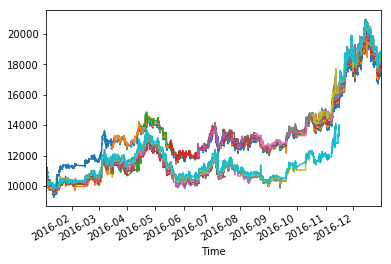

In [26]:
Ru.query('LastPrice>0').groupby(by='InstrumentID').LastPrice.plot()

Ru has lots of trash data, in which the LastPrice < 0

In [36]:
Ru.query('InstrumentID=="ru1601" and Date==20160115')

,InstrumentID,Date,TimeStamp,LastPrice,HighPrice,LowPrice,Volume,Turnover,AccVolume,AccTurnover,SettlePrice,OpenInterest,AskPrice1,AskPrice2,AskPrice3,AskPrice4,AskPrice5,AskVolume1,AskVolume2,AskVolume3,AskVolume4,AskVolume5,BidPrice1,BidPrice2,BidPrice3,BidPrice4,BidPrice5,BidVolume1,BidVolume2,BidVolume3,BidVolume4,BidVolume5,Type,AveragePrice,UpperLimitPrice,LowerLimitPrice,UpdateTime
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 09:00:00.500,ru1601,20160115,1.452820e+12,9610.0,9750.0,9520.0,0.0,0.0,118.0,11294600.0,-1.0,6936.0,9750.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,9530.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,9571.0,10110.0,8965.0,09:00:00.500
2016-01-15 09:00:01.000,ru1601,20160115,1.452820e+12,9610.0,9750.0,9520.0,0.0,0.0,118.0,11294600.0,-1.0,6936.0,9750.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,9570.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,9571.0,10110.0,8965.0,09:00:01.000
2016-01-15 09:00:01.500,ru1601,20160115,1.452820e+12,9610.0,9750.0,9520.0,0.0,0.0,118.0,11294600.0,-1.0,6936.0,9750.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,9530.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,9571.0,10110.0,8965.0,09:00:01.500
2016-01-15 09:00:02.000,ru1601,20160115,1.452820e+12,9610.0,9750.0,9520.0,0.0,0.0,118.0,11294600.0,-1.0,6936.0,9750.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,9580.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,9571.0,10110.0,8965.0,09:00:02.000
2016-01-15 09:00:02.500,ru1601,20160115,1.452820e+12,9610.0,9750.0,9520.0,0.0,0.0,118.0,11294600.0,-1.0,6936.0,9750.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,9530.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,9571.0,10110.0,8965.0,09:00:02.500
2016-01-15 09:00:03.000,ru1601,20160115,1.452820e+12,9610.0,9750.0,9520.0,0.0,0.0,118.0,11294600.0,-1.0,6936.0,9750.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,9570.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,9571.0,10110.0,8965.0,09:00:03.000
2016-01-15 09:00:04.000,ru1601,20160115,1.452820e+12,9610.0,9750.0,9520.0,0.0,0.0,118.0,11294600.0,-1.0,6936.0,9750.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,9530.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,9571.0,10110.0,8965.0,09:00:04.000
2016-01-15 09:00:04.500,ru1601,20160115,1.452820e+12,9610.0,9750.0,9520.0,0.0,0.0,118.0,11294600.0,-1.0,6936.0,9750.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,9565.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,9571.0,10110.0,8965.0,09:00:04.500
2016-01-15 09:00:05.000,ru1601,20160115,1.452820e+12,9610.0,9750.0,9520.0,0.0,0.0,118.0,11294600.0,-1.0,6936.0,9750.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,9530.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,9571.0,10110.0,8965.0,09:00:05.000


In [ ]:
Ru.query('LastPrice<0')